In [1]:
#Exploratory Data Analysis (EDA)
# step:1.Importing the libraries and loading the dataset

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Loading the  dataset
planets = sns.load_dataset('planets')

# Basic info
planets.info()
planets.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [2]:
# step:2. Missing Value Analysis

# Count missing values
missing = planets.isnull().sum()
missing_percent = (missing / len(planets)) * 100
missing_df = pd.DataFrame({'Missing Values': missing, 'Percentage (%)': missing_percent})
print(missing_df)


                Missing Values  Percentage (%)
method                       0        0.000000
number                       0        0.000000
orbital_period              43        4.154589
mass                       522       50.434783
distance                   227       21.932367
year                         0        0.000000


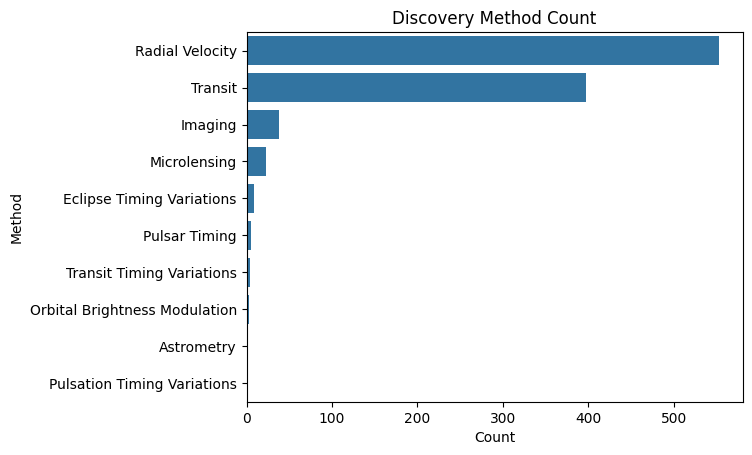

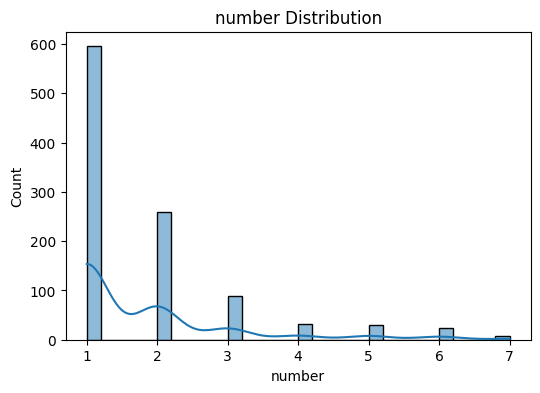

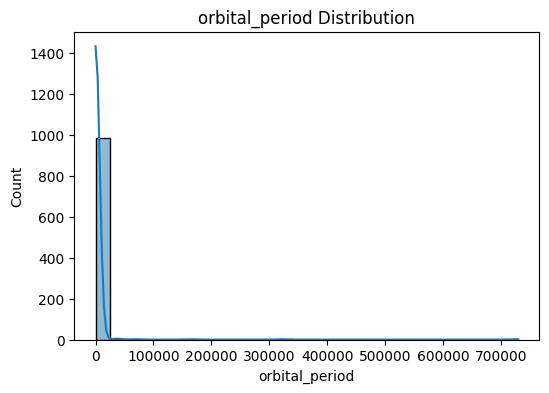

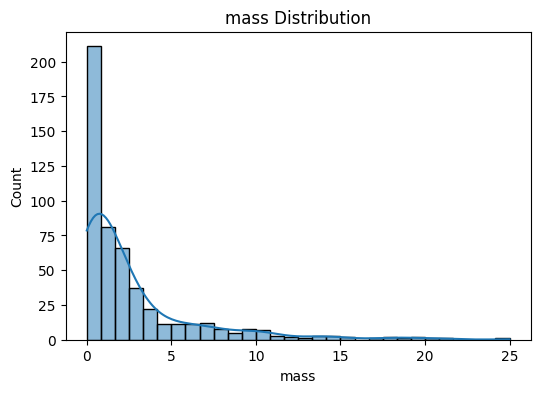

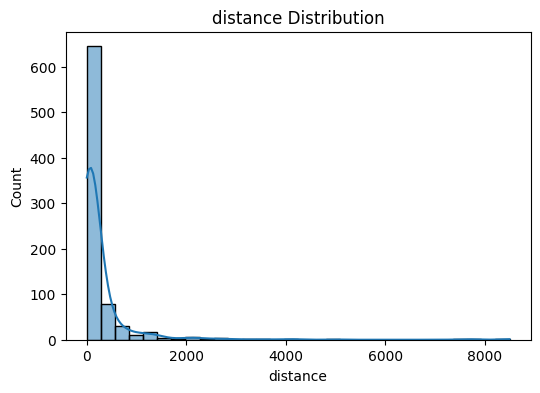

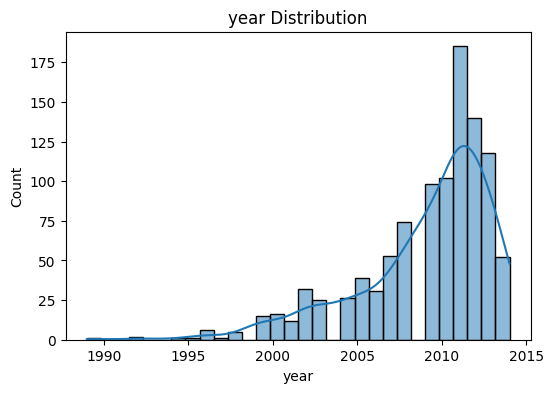

In [3]:
# step:3. Univariate Analysis
#A. Discovery Method Distribution

sns.countplot(y='method', data=planets, order=planets['method'].value_counts().index)
plt.title("Discovery Method Count")
plt.xlabel("Count")
plt.ylabel("Method")
plt.show()

#B. Numerical Columns Histogram

num_cols = ['number', 'orbital_period', 'mass', 'distance', 'year']
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(planets[col], kde=True, bins=30)
    plt.title(f'{col} Distribution')
    plt.show()


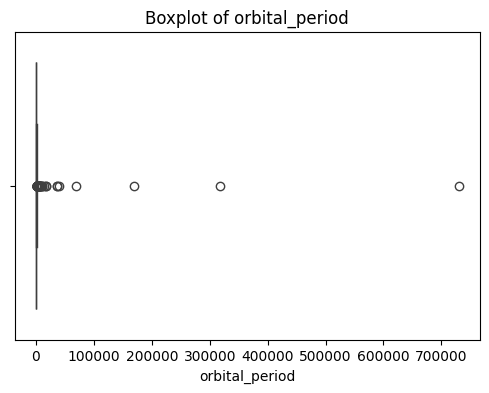

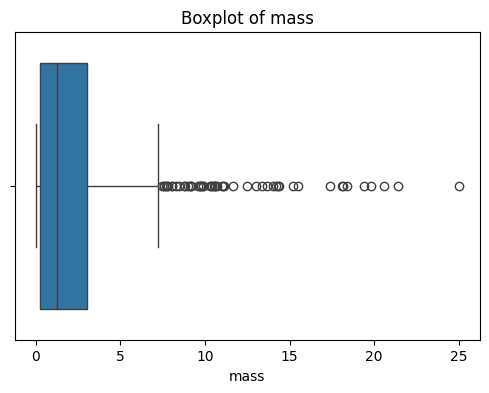

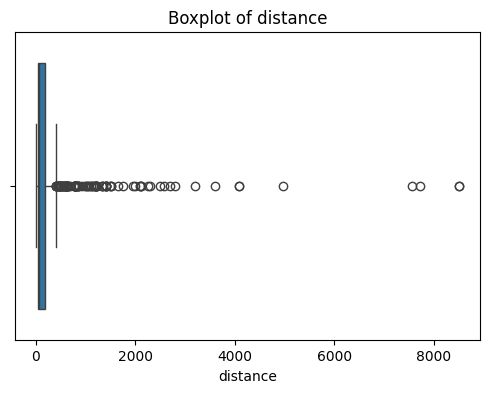

In [4]:
# step:4. Outlier Detection with Boxplots

for col in ['orbital_period', 'mass', 'distance']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=planets[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


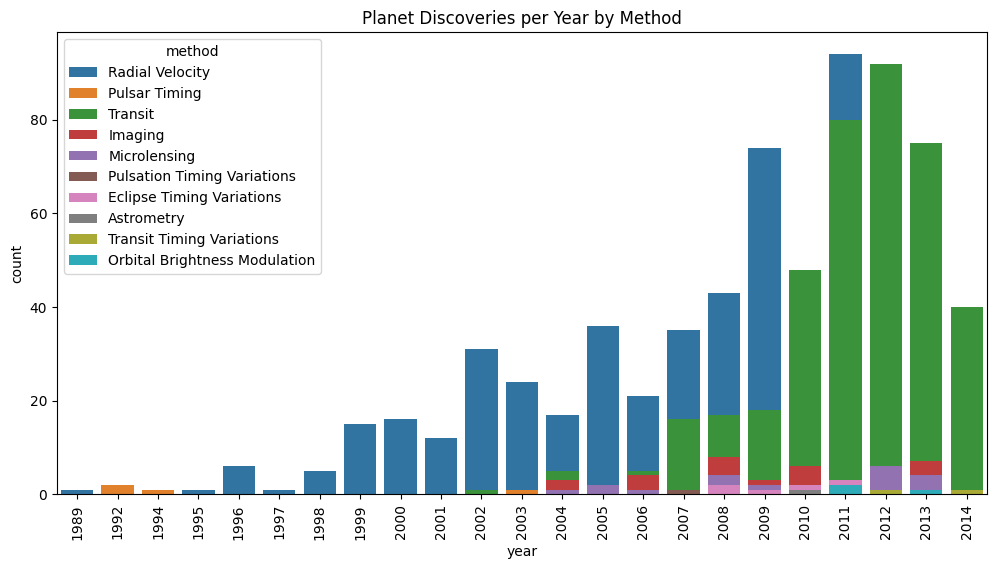

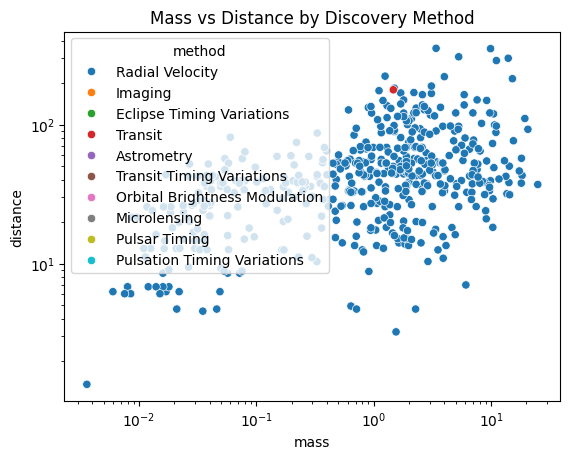

In [5]:
# step:5. Bivariate Analysis
#A. Discovery Year vs Method

plt.figure(figsize=(12, 6))
sns.countplot(x='year', hue='method', data=planets, palette='tab10', dodge=False)
plt.title('Planet Discoveries per Year by Method')
plt.xticks(rotation=90)
plt.show()

#B. Mass vs Distance

sns.scatterplot(x='mass', y='distance', hue='method', data=planets)
plt.xscale('log')
plt.yscale('log')
plt.title('Mass vs Distance by Discovery Method')
plt.show()


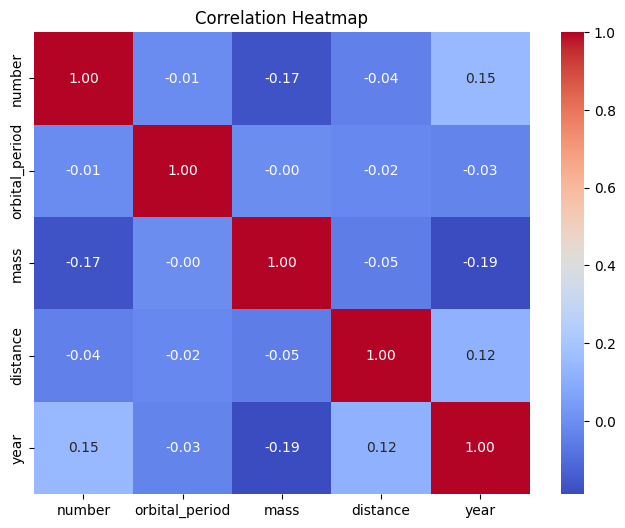

In [6]:
# step:6. Correlation Matrix and Heatmap

# Drop non-numeric columns
numeric_df = planets.select_dtypes(include=[np.number])

# Fill NA for correlation
numeric_df_filled = numeric_df.fillna(numeric_df.median())

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df_filled.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


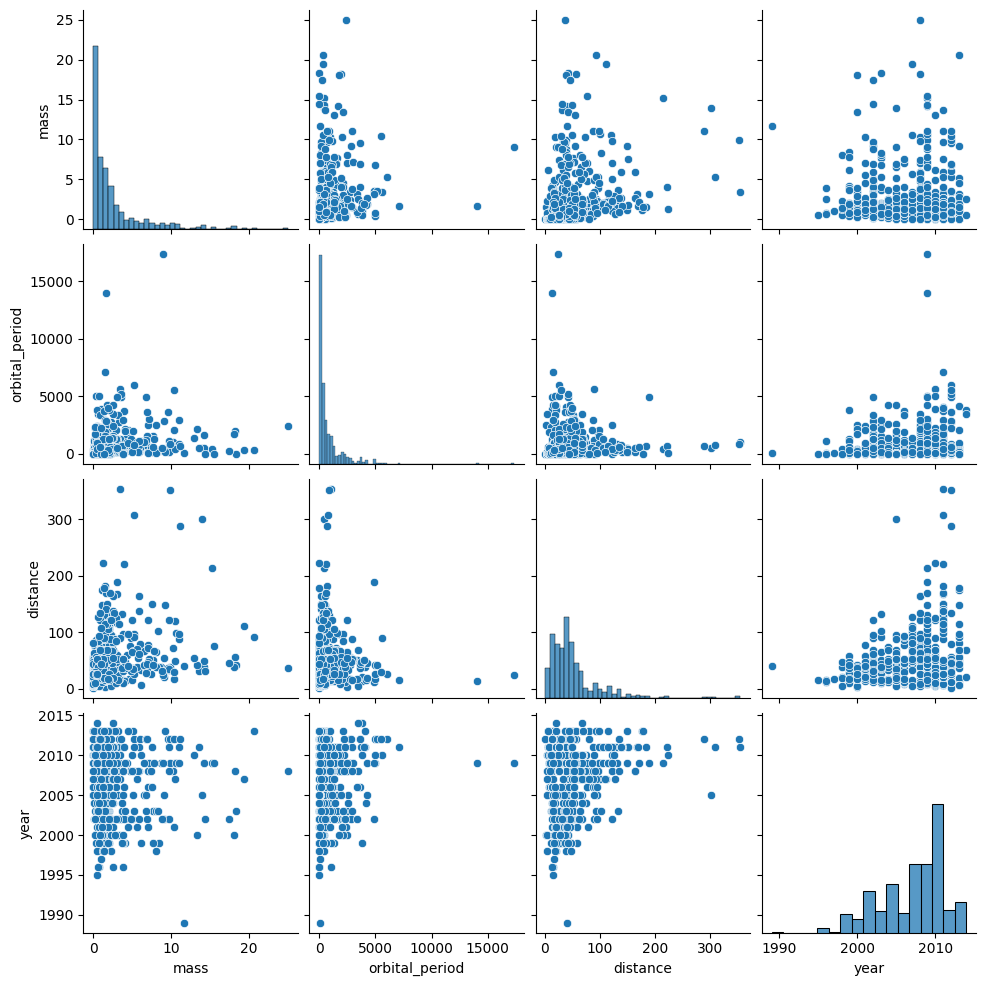

In [7]:
# step:7. Pairplot to Visualize Relationships

sns.pairplot(planets[['mass', 'orbital_period', 'distance', 'year']].dropna())
plt.show()
